In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchaudio
from torchaudio.datasets import LIBRISPEECH
from torch.utils.data import DataLoader
from torchvision import datasets
from tqdm import tqdm
print(torch.__version__, torchaudio.__version__)



2.3.0 2.3.0


# Model

In [6]:
import sys
sys.path.append('../src')
sys.path.append('../data')

from model import SpeechRecognitionModel


In [7]:
from dataloader import LibriSpeechDataset
librispeech_path = "../data/raw/LibriSpeech/train-clean-100/"
Dataset = LibriSpeechDataset(librispeech_path, 'train-clean-100')

waveform, transcript = Dataset.get_waveform_and_label(0)
print(waveform.shape, transcript)

torch.Size([1, 225360]) CHAPTER ONE MISSUS RACHEL LYNDE IS SURPRISED MISSUS RACHEL LYNDE LIVED JUST WHERE THE AVONLEA MAIN ROAD DIPPED DOWN INTO A LITTLE HOLLOW FRINGED WITH ALDERS AND LADIES EARDROPS AND TRAVERSED BY A BROOK


c:\ProgramData\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


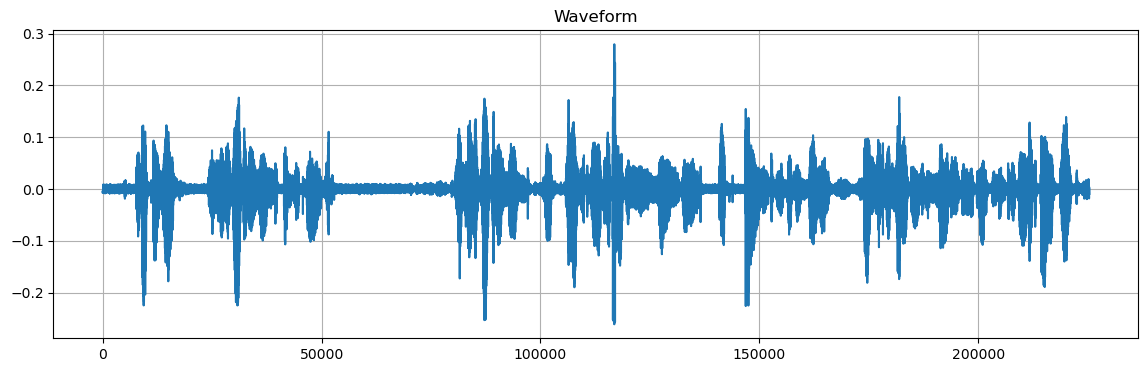

c:\ProgramData\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (128) may be set too low.
  warnings.warn(


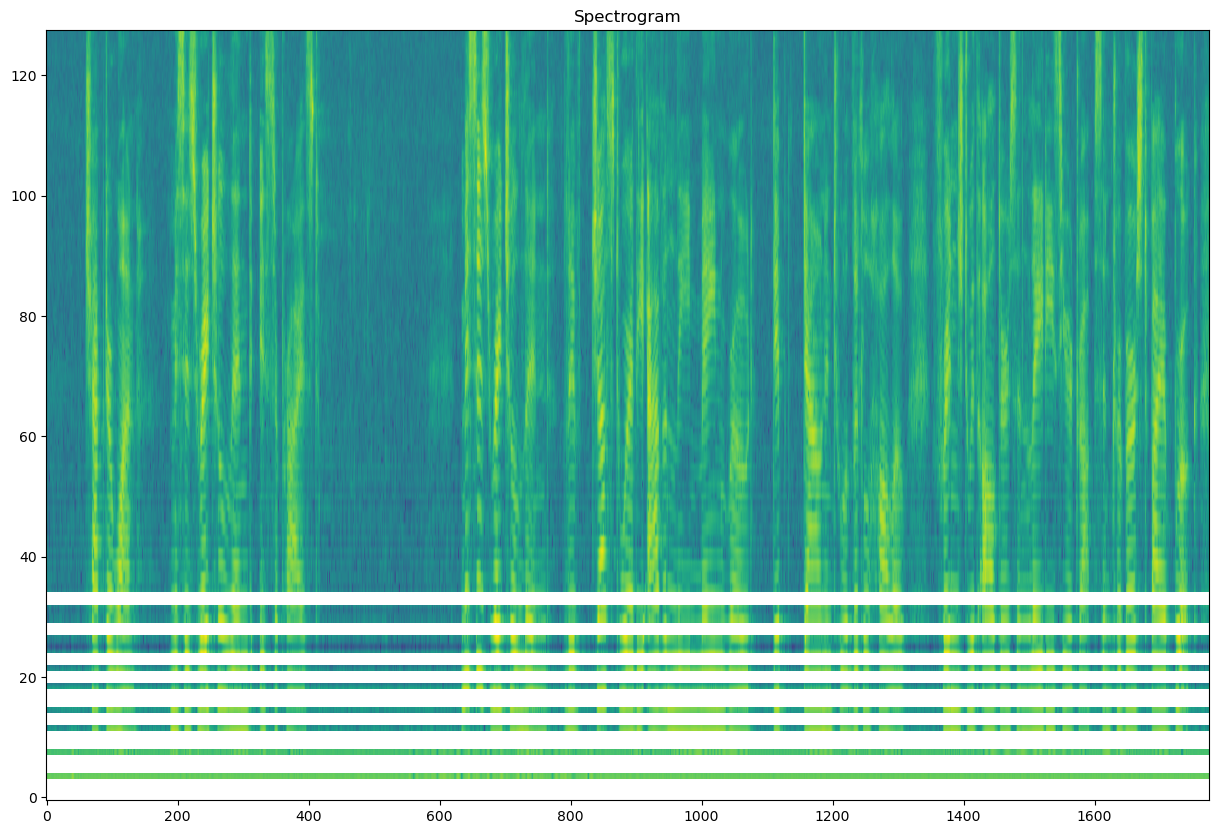

In [4]:
#train_dataset2k = train_dataset[:2000]
import matplotlib.pyplot as plt
def display_waveform_and_spectogram(waveform, title="Waveform", xlim=None):
    plt.figure(figsize=(14, 4))
    plt.title(title)
    plt.plot(waveform.t().numpy())
    plt.grid()
    if xlim:
        plt.xlim(xlim)
    plt.show()

    n_fft = 254  # Fourier window width
    hop_length = 127  # Overlap of 127 frames
    n_mels = 128  # 128 features per frame
    # MelSpectrogram function
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=16000,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )   
    # Apply the transformation to the input waveform
    mel_spec = mel_spectrogram(waveform)
    # plot
    plt.figure(figsize=(15, 10))
    plt.imshow(mel_spec.log2()[0].detach().numpy(), aspect='auto', origin='lower')
    plt.title('Spectrogram')
    plt.show()


# Afficher le waveform et le spectrogramme
display_waveform_and_spectogram(waveform)

In [5]:
# from collate_fn import collate_fn_Libri

# vocab = {
#     'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 
#     'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 
#     'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 
#     'z': 25, ' ': 26, "'": 27, 'blank': 28
# }

# #load pth file
# data = torch.load('../data/processed/librispeech_dataset.pth')

# train_set = data['train_files']
# valid_set = data['val_files']
# test_set = data['test_files']



# train_loader = DataLoader(train_set, batch_size=32, collate_fn=lambda batch: collate_fn_Libri(batch, vocab=vocab))
# valid_loader = DataLoader(valid_set, batch_size=32, collate_fn=lambda batch: collate_fn_Libri(batch, vocab=vocab))
# test_loader = DataLoader(test_set, batch_size=32, collate_fn=lambda batch: collate_fn_Libri(batch, vocab=vocab))
# print("Nombre de batchs :", len(train_loader))
# print("Nombre de batchs :", len(valid_loader))
# print("Nombre de batchs :", len(test_loader))


# MNIST

### chargement

In [8]:
# load mnist dataset
from collate_fn import collate_fn_MNIST

data = torch.load('../data/processed/mnist_audio_dataset.pth')
train_dataset = data['train_dataset']
val_dataset = data['val_dataset']
test_dataset = data['test_dataset']
# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn_MNIST)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_MNIST)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_MNIST)

print("Nombre de batchs :", len(train_loader))
print("Nombre de batchs :", len(val_loader))
print("Nombre de batchs :", len(test_loader))




Nombre de batchs : 329
Nombre de batchs : 71
Nombre de batchs : 71


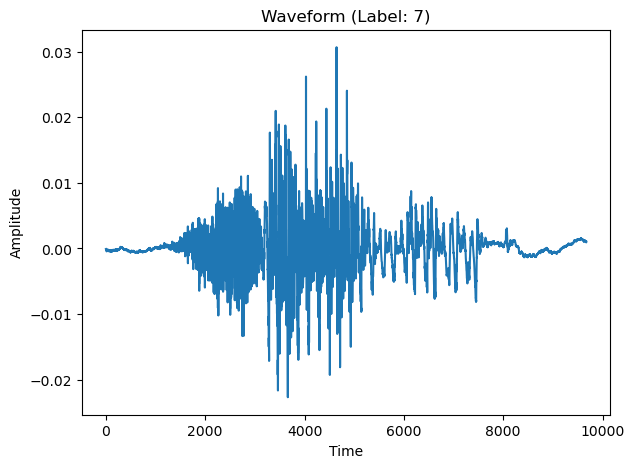

c:\ProgramData\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (251) may be set too low.
  warnings.warn(


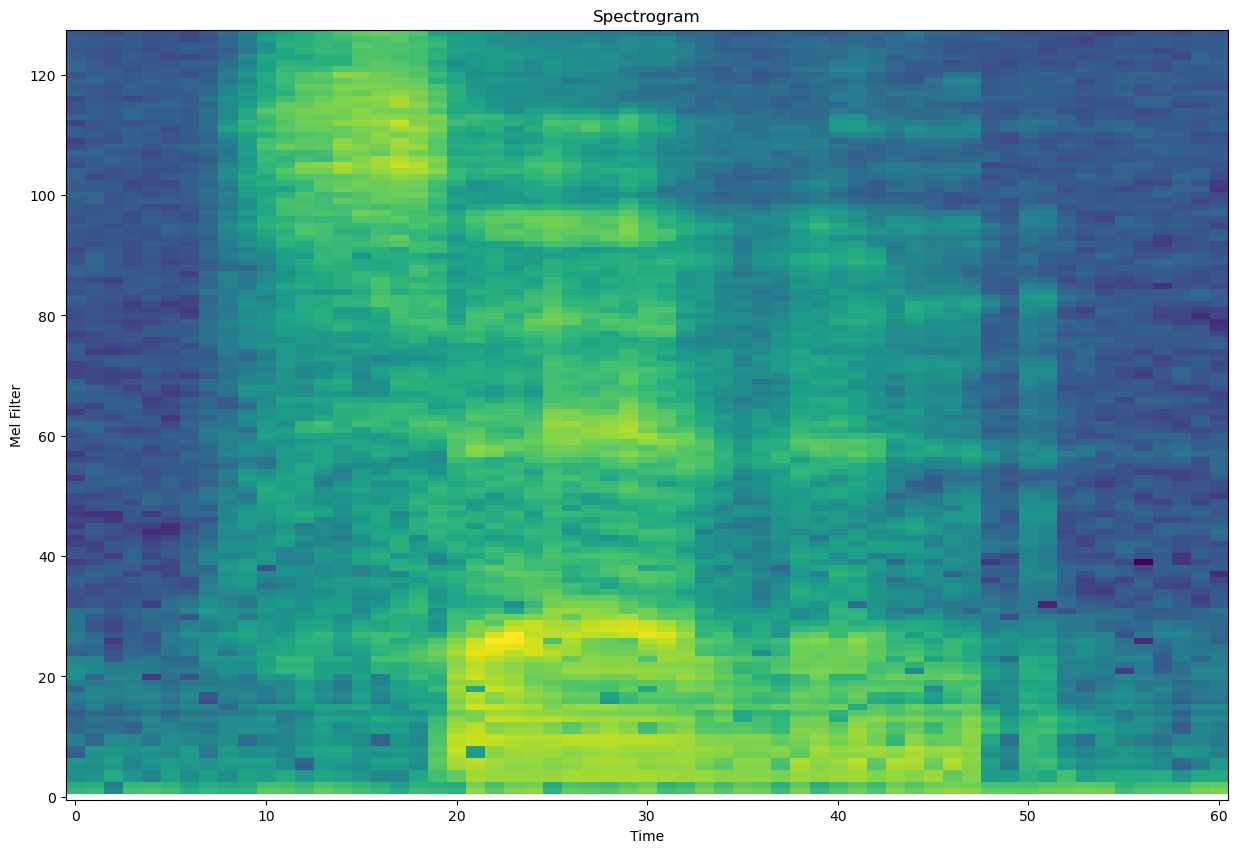

In [4]:


# Example
import matplotlib.pyplot as plt
import torchaudio.transforms as T


def display_waveform_and_spectogram(dataset, idx):
    # Retrieve the waveform and label
    waveform, label = dataset.audio_files[idx], dataset.labels[idx]
    waveform, sr = torchaudio.load(waveform)
    
    # Resample if needed
    if sr != 16000:
        resampler = T.Resample(orig_freq=sr, new_freq=16000)
        waveform = resampler(waveform)
    

    # Plot waveform
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(waveform.t().numpy())
    plt.title(f"Waveform (Label: {label})")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    plt.show()

    # Plot Spectrogram
    mel_spectrogram = T.MelSpectrogram(
        sample_rate=16000,
        n_fft=500,
        hop_length=160,
        n_mels=128
    )
    mel_spec = mel_spectrogram(waveform)
    plt.figure(figsize=(15,10))
    plt.imshow(mel_spec.log2()[0].detach().numpy(), aspect='auto', origin='lower')
    plt.title("Spectrogram")
    plt.xlabel("Time")
    plt.ylabel("Mel Filter")
    plt.show()
    
    

# Example display
example_idx = 10  # Change this to visualize a different sample
display_waveform_and_spectogram(train_dataset, example_idx)




In [8]:
from train import Training


vocab = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'blank':10
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpeechRecognitionModel(input_dim=128, hidden_dim=256, output_dim=len(vocab) + 1, num_layers=5).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)


trainer = Training(
    model=model,
    criterion=nn.CTCLoss(blank=10).to(device),
    optimizer=optimizer,
    scheduler=optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.4),
    device=device

)
num_epochs = 10
trainer.train(train_loader, val_loader, num_epochs, 'MNIST')

Epoch 1/10: 100%|██████████| 329/329 [01:32<00:00,  3.55it/s]


Epoch 1/10, Training Loss: 13.6240
Epoch 1/10, Validation Loss: 3.2966
Best model saved with Validation Loss: 3.2966


Epoch 2/10: 100%|██████████| 329/329 [01:38<00:00,  3.35it/s]


Epoch 2/10, Training Loss: 3.2896
Epoch 2/10, Validation Loss: 3.2796
Best model saved with Validation Loss: 3.2796


Epoch 3/10: 100%|██████████| 329/329 [01:39<00:00,  3.29it/s]


Epoch 3/10, Training Loss: 2.9735
Epoch 3/10, Validation Loss: 2.4207
Best model saved with Validation Loss: 2.4207


Epoch 4/10: 100%|██████████| 329/329 [01:41<00:00,  3.25it/s]


Epoch 4/10, Training Loss: 1.9880
Epoch 4/10, Validation Loss: 1.6873
Best model saved with Validation Loss: 1.6873


Epoch 5/10: 100%|██████████| 329/329 [01:39<00:00,  3.30it/s]


Epoch 5/10, Training Loss: 1.3960
Epoch 5/10, Validation Loss: 1.1332
Best model saved with Validation Loss: 1.1332


Epoch 6/10: 100%|██████████| 329/329 [01:41<00:00,  3.25it/s]


Epoch 6/10, Training Loss: 0.9624
Epoch 6/10, Validation Loss: 0.8436
Best model saved with Validation Loss: 0.8436


Epoch 7/10: 100%|██████████| 329/329 [01:42<00:00,  3.22it/s]


Epoch 7/10, Training Loss: 0.7419
Epoch 7/10, Validation Loss: 0.6411
Best model saved with Validation Loss: 0.6411


Epoch 8/10: 100%|██████████| 329/329 [01:46<00:00,  3.09it/s]


Epoch 8/10, Training Loss: 0.5951
Epoch 8/10, Validation Loss: 0.5231
Best model saved with Validation Loss: 0.5231


Epoch 9/10: 100%|██████████| 329/329 [01:47<00:00,  3.07it/s]


Epoch 9/10, Training Loss: 0.4649
Epoch 9/10, Validation Loss: 0.4352
Best model saved with Validation Loss: 0.4352


Epoch 10/10: 100%|██████████| 329/329 [01:43<00:00,  3.17it/s]


Epoch 10/10, Training Loss: 0.3711
Epoch 10/10, Validation Loss: 0.3335
Best model saved with Validation Loss: 0.3335


## Testing

100%|██████████| 71/71 [00:17<00:00,  4.16it/s]


Test Loss: 0.3263
Test Accuracy: 91.24%


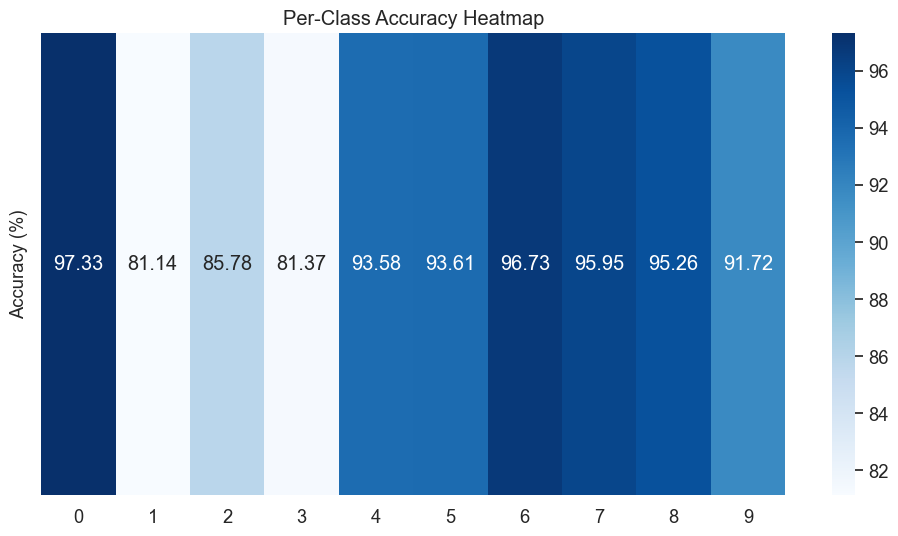

In [8]:
from test_model import Testing
# loading the best model
vocab = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'blank':10
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model = SpeechRecognitionModel(input_dim=128, hidden_dim=256, output_dim=len(vocab) + 1, num_layers=5).to(device)
best_model.load_state_dict(torch.load('..\\outputs\\best_MNIST_model.pth'))
tester = Testing(model=best_model, criterion=nn.CTCLoss(blank=10).to(device), device=device)

tester.test(test_loader, vocab)

### More Training

In [9]:
from train import Training


vocab = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'blank':10
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpeechRecognitionModel(input_dim=128, hidden_dim=256, output_dim=len(vocab) + 1, num_layers=5).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)


trainer = Training(
    model=model,
    criterion=nn.CTCLoss(blank=10).to(device),
    optimizer=optimizer,
    scheduler=optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.4),
    device=device

)
num_epochs = 500
trainer.train(train_loader, val_loader, num_epochs, 'MNIST')

Epoch 1/500: 100%|██████████| 329/329 [01:45<00:00,  3.11it/s]


Epoch 1/500, Training Loss: 13.8368
Epoch 1/500, Validation Loss: 3.2952
Best model saved with Validation Loss: 3.2952


Epoch 2/500: 100%|██████████| 329/329 [01:33<00:00,  3.53it/s]


Epoch 2/500, Training Loss: 3.2853
Epoch 2/500, Validation Loss: 3.2562
Best model saved with Validation Loss: 3.2562


Epoch 3/500: 100%|██████████| 329/329 [01:34<00:00,  3.48it/s]


Epoch 3/500, Training Loss: 3.1021
Epoch 3/500, Validation Loss: 2.8518
Best model saved with Validation Loss: 2.8518


Epoch 4/500: 100%|██████████| 329/329 [01:34<00:00,  3.46it/s]


Epoch 4/500, Training Loss: 2.2701
Epoch 4/500, Validation Loss: 1.6049
Best model saved with Validation Loss: 1.6049


Epoch 5/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 5/500, Training Loss: 1.2957
Epoch 5/500, Validation Loss: 1.2398
Best model saved with Validation Loss: 1.2398


Epoch 6/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 6/500, Training Loss: 0.9667
Epoch 6/500, Validation Loss: 0.8822
Best model saved with Validation Loss: 0.8822


Epoch 7/500: 100%|██████████| 329/329 [01:34<00:00,  3.47it/s]


Epoch 7/500, Training Loss: 0.7910
Epoch 7/500, Validation Loss: 0.7301
Best model saved with Validation Loss: 0.7301


Epoch 8/500: 100%|██████████| 329/329 [01:34<00:00,  3.47it/s]


Epoch 8/500, Training Loss: 0.6276
Epoch 8/500, Validation Loss: 0.5509
Best model saved with Validation Loss: 0.5509


Epoch 9/500: 100%|██████████| 329/329 [01:34<00:00,  3.47it/s]


Epoch 9/500, Training Loss: 0.5303
Epoch 9/500, Validation Loss: 0.4514
Best model saved with Validation Loss: 0.4514


Epoch 10/500: 100%|██████████| 329/329 [01:34<00:00,  3.47it/s]


Epoch 10/500, Training Loss: 0.4117
Epoch 10/500, Validation Loss: 0.3902
Best model saved with Validation Loss: 0.3902


Epoch 11/500: 100%|██████████| 329/329 [01:34<00:00,  3.47it/s]


Epoch 11/500, Training Loss: 0.3305
Epoch 11/500, Validation Loss: 0.3418
Best model saved with Validation Loss: 0.3418


Epoch 12/500: 100%|██████████| 329/329 [01:35<00:00,  3.46it/s]


Epoch 12/500, Training Loss: 0.2968
Epoch 12/500, Validation Loss: 0.3498


Epoch 13/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 13/500, Training Loss: 0.2742
Epoch 13/500, Validation Loss: 0.2954
Best model saved with Validation Loss: 0.2954


Epoch 14/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 14/500, Training Loss: 0.2470
Epoch 14/500, Validation Loss: 0.3086


Epoch 15/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 15/500, Training Loss: 0.2289
Epoch 15/500, Validation Loss: 0.2701
Best model saved with Validation Loss: 0.2701


Epoch 16/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 16/500, Training Loss: 0.1970
Epoch 16/500, Validation Loss: 0.2182
Best model saved with Validation Loss: 0.2182


Epoch 17/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 17/500, Training Loss: 0.1801
Epoch 17/500, Validation Loss: 0.2153
Best model saved with Validation Loss: 0.2153


Epoch 18/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 18/500, Training Loss: 0.1720
Epoch 18/500, Validation Loss: 0.2065
Best model saved with Validation Loss: 0.2065


Epoch 19/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 19/500, Training Loss: 0.1651
Epoch 19/500, Validation Loss: 0.2074


Epoch 20/500: 100%|██████████| 329/329 [01:35<00:00,  3.46it/s]


Epoch 20/500, Training Loss: 0.1597
Epoch 20/500, Validation Loss: 0.1881
Best model saved with Validation Loss: 0.1881


Epoch 21/500: 100%|██████████| 329/329 [01:35<00:00,  3.46it/s]


Epoch 21/500, Training Loss: 0.1421
Epoch 21/500, Validation Loss: 0.1830
Best model saved with Validation Loss: 0.1830


Epoch 22/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 22/500, Training Loss: 0.1382
Epoch 22/500, Validation Loss: 0.1811
Best model saved with Validation Loss: 0.1811


Epoch 23/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 23/500, Training Loss: 0.1342
Epoch 23/500, Validation Loss: 0.1777
Best model saved with Validation Loss: 0.1777


Epoch 24/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 24/500, Training Loss: 0.1315
Epoch 24/500, Validation Loss: 0.1743
Best model saved with Validation Loss: 0.1743


Epoch 25/500: 100%|██████████| 329/329 [01:35<00:00,  3.46it/s]


Epoch 25/500, Training Loss: 0.1287
Epoch 25/500, Validation Loss: 0.1736
Best model saved with Validation Loss: 0.1736


Epoch 26/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 26/500, Training Loss: 0.1235
Epoch 26/500, Validation Loss: 0.1686
Best model saved with Validation Loss: 0.1686


Epoch 27/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 27/500, Training Loss: 0.1207
Epoch 27/500, Validation Loss: 0.1681
Best model saved with Validation Loss: 0.1681


Epoch 28/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 28/500, Training Loss: 0.1197
Epoch 28/500, Validation Loss: 0.1671
Best model saved with Validation Loss: 0.1671


Epoch 29/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 29/500, Training Loss: 0.1182
Epoch 29/500, Validation Loss: 0.1666
Best model saved with Validation Loss: 0.1666


Epoch 30/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 30/500, Training Loss: 0.1166
Epoch 30/500, Validation Loss: 0.1650
Best model saved with Validation Loss: 0.1650


Epoch 31/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 31/500, Training Loss: 0.1144
Epoch 31/500, Validation Loss: 0.1644
Best model saved with Validation Loss: 0.1644


Epoch 32/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 32/500, Training Loss: 0.1137
Epoch 32/500, Validation Loss: 0.1639
Best model saved with Validation Loss: 0.1639


Epoch 33/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 33/500, Training Loss: 0.1129
Epoch 33/500, Validation Loss: 0.1646


Epoch 34/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 34/500, Training Loss: 0.1124
Epoch 34/500, Validation Loss: 0.1635
Best model saved with Validation Loss: 0.1635


Epoch 35/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 35/500, Training Loss: 0.1117
Epoch 35/500, Validation Loss: 0.1628
Best model saved with Validation Loss: 0.1628


Epoch 36/500: 100%|██████████| 329/329 [01:35<00:00,  3.46it/s]


Epoch 36/500, Training Loss: 0.1113
Epoch 36/500, Validation Loss: 0.1627
Best model saved with Validation Loss: 0.1627


Epoch 37/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 37/500, Training Loss: 0.1105
Epoch 37/500, Validation Loss: 0.1625
Best model saved with Validation Loss: 0.1625


Epoch 38/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 38/500, Training Loss: 0.1113
Epoch 38/500, Validation Loss: 0.1625
Best model saved with Validation Loss: 0.1625


Epoch 39/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 39/500, Training Loss: 0.1100
Epoch 39/500, Validation Loss: 0.1621
Best model saved with Validation Loss: 0.1621


Epoch 40/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 40/500, Training Loss: 0.1099
Epoch 40/500, Validation Loss: 0.1619
Best model saved with Validation Loss: 0.1619


Epoch 41/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 41/500, Training Loss: 0.1096
Epoch 41/500, Validation Loss: 0.1621


Epoch 42/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 42/500, Training Loss: 0.1105
Epoch 42/500, Validation Loss: 0.1620


Epoch 43/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 43/500, Training Loss: 0.1098
Epoch 43/500, Validation Loss: 0.1620


Epoch 44/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 44/500, Training Loss: 0.1091
Epoch 44/500, Validation Loss: 0.1619
Best model saved with Validation Loss: 0.1619


Epoch 45/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 45/500, Training Loss: 0.1091
Epoch 45/500, Validation Loss: 0.1620


Epoch 46/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 46/500, Training Loss: 0.1092
Epoch 46/500, Validation Loss: 0.1617
Best model saved with Validation Loss: 0.1617


Epoch 47/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 47/500, Training Loss: 0.1089
Epoch 47/500, Validation Loss: 0.1617
Best model saved with Validation Loss: 0.1617


Epoch 48/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 48/500, Training Loss: 0.1088
Epoch 48/500, Validation Loss: 0.1617
Best model saved with Validation Loss: 0.1617


Epoch 49/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 49/500, Training Loss: 0.1088
Epoch 49/500, Validation Loss: 0.1617
Best model saved with Validation Loss: 0.1617


Epoch 50/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 50/500, Training Loss: 0.1087
Epoch 50/500, Validation Loss: 0.1617
Best model saved with Validation Loss: 0.1617


Epoch 51/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 51/500, Training Loss: 0.1087
Epoch 51/500, Validation Loss: 0.1617
Best model saved with Validation Loss: 0.1617


Epoch 52/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 52/500, Training Loss: 0.1088
Epoch 52/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 53/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 53/500, Training Loss: 0.1087
Epoch 53/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 54/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 54/500, Training Loss: 0.1086
Epoch 54/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 55/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 55/500, Training Loss: 0.1086
Epoch 55/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 56/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 56/500, Training Loss: 0.1086
Epoch 56/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 57/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 57/500, Training Loss: 0.1088
Epoch 57/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 58/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 58/500, Training Loss: 0.1086
Epoch 58/500, Validation Loss: 0.1616


Epoch 59/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 59/500, Training Loss: 0.1085
Epoch 59/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 60/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 60/500, Training Loss: 0.1086
Epoch 60/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 61/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 61/500, Training Loss: 0.1085
Epoch 61/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 62/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 62/500, Training Loss: 0.1093
Epoch 62/500, Validation Loss: 0.1616


Epoch 63/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 63/500, Training Loss: 0.1086
Epoch 63/500, Validation Loss: 0.1616


Epoch 64/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 64/500, Training Loss: 0.1085
Epoch 64/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 65/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 65/500, Training Loss: 0.1086
Epoch 65/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 66/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 66/500, Training Loss: 0.1094
Epoch 66/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 67/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 67/500, Training Loss: 0.1085
Epoch 67/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 68/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 68/500, Training Loss: 0.1085
Epoch 68/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 69/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 69/500, Training Loss: 0.1085
Epoch 69/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 70/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 70/500, Training Loss: 0.1086
Epoch 70/500, Validation Loss: 0.1616


Epoch 71/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 71/500, Training Loss: 0.1085
Epoch 71/500, Validation Loss: 0.1616


Epoch 72/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 72/500, Training Loss: 0.1085
Epoch 72/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 73/500: 100%|██████████| 329/329 [01:35<00:00,  3.45it/s]


Epoch 73/500, Training Loss: 0.1086
Epoch 73/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 74/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 74/500, Training Loss: 0.1086
Epoch 74/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 75/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 75/500, Training Loss: 0.1085
Epoch 75/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 76/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 76/500, Training Loss: 0.1085
Epoch 76/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 77/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 77/500, Training Loss: 0.1086
Epoch 77/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 78/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 78/500, Training Loss: 0.1085
Epoch 78/500, Validation Loss: 0.1616


Epoch 79/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 79/500, Training Loss: 0.1086
Epoch 79/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 80/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 80/500, Training Loss: 0.1098
Epoch 80/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 81/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 81/500, Training Loss: 0.1085
Epoch 81/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 82/500: 100%|██████████| 329/329 [01:36<00:00,  3.40it/s]


Epoch 82/500, Training Loss: 0.1087
Epoch 82/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 83/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 83/500, Training Loss: 0.1085
Epoch 83/500, Validation Loss: 0.1616
Best model saved with Validation Loss: 0.1616


Epoch 84/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 84/500, Training Loss: 0.1085
Epoch 84/500, Validation Loss: 0.1616


Epoch 85/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 85/500, Training Loss: 0.1085
Epoch 85/500, Validation Loss: 0.1616


Epoch 86/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 86/500, Training Loss: 0.1085
Epoch 86/500, Validation Loss: 0.1616


Epoch 87/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 87/500, Training Loss: 0.1085
Epoch 87/500, Validation Loss: 0.1616


Epoch 88/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 88/500, Training Loss: 0.1095
Epoch 88/500, Validation Loss: 0.1616


Epoch 89/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 89/500, Training Loss: 0.1086
Epoch 89/500, Validation Loss: 0.1616


Epoch 90/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 90/500, Training Loss: 0.1085
Epoch 90/500, Validation Loss: 0.1616


Epoch 91/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 91/500, Training Loss: 0.1085
Epoch 91/500, Validation Loss: 0.1616


Epoch 92/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 92/500, Training Loss: 0.1097
Epoch 92/500, Validation Loss: 0.1616


Epoch 93/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 93/500, Training Loss: 0.1085
Epoch 93/500, Validation Loss: 0.1616


Epoch 94/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 94/500, Training Loss: 0.1085
Epoch 94/500, Validation Loss: 0.1616


Epoch 95/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 95/500, Training Loss: 0.1085
Epoch 95/500, Validation Loss: 0.1616


Epoch 96/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 96/500, Training Loss: 0.1086
Epoch 96/500, Validation Loss: 0.1616


Epoch 97/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 97/500, Training Loss: 0.1085
Epoch 97/500, Validation Loss: 0.1616


Epoch 98/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 98/500, Training Loss: 0.1085
Epoch 98/500, Validation Loss: 0.1616


Epoch 99/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 99/500, Training Loss: 0.1085
Epoch 99/500, Validation Loss: 0.1616


Epoch 100/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 100/500, Training Loss: 0.1088
Epoch 100/500, Validation Loss: 0.1616


Epoch 101/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 101/500, Training Loss: 0.1086
Epoch 101/500, Validation Loss: 0.1616


Epoch 102/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 102/500, Training Loss: 0.1085
Epoch 102/500, Validation Loss: 0.1616


Epoch 103/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 103/500, Training Loss: 0.1086
Epoch 103/500, Validation Loss: 0.1616


Epoch 104/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 104/500, Training Loss: 0.1085
Epoch 104/500, Validation Loss: 0.1616


Epoch 105/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 105/500, Training Loss: 0.1087
Epoch 105/500, Validation Loss: 0.1616


Epoch 106/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 106/500, Training Loss: 0.1087
Epoch 106/500, Validation Loss: 0.1616


Epoch 107/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 107/500, Training Loss: 0.1096
Epoch 107/500, Validation Loss: 0.1616


Epoch 108/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 108/500, Training Loss: 0.1087
Epoch 108/500, Validation Loss: 0.1616


Epoch 109/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 109/500, Training Loss: 0.1085
Epoch 109/500, Validation Loss: 0.1616


Epoch 110/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 110/500, Training Loss: 0.1085
Epoch 110/500, Validation Loss: 0.1616


Epoch 111/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 111/500, Training Loss: 0.1085
Epoch 111/500, Validation Loss: 0.1616


Epoch 112/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 112/500, Training Loss: 0.1086
Epoch 112/500, Validation Loss: 0.1616


Epoch 113/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 113/500, Training Loss: 0.1086
Epoch 113/500, Validation Loss: 0.1616


Epoch 114/500: 100%|██████████| 329/329 [01:36<00:00,  3.40it/s]


Epoch 114/500, Training Loss: 0.1088
Epoch 114/500, Validation Loss: 0.1616


Epoch 115/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 115/500, Training Loss: 0.1085
Epoch 115/500, Validation Loss: 0.1616


Epoch 116/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 116/500, Training Loss: 0.1086
Epoch 116/500, Validation Loss: 0.1616


Epoch 117/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 117/500, Training Loss: 0.1088
Epoch 117/500, Validation Loss: 0.1616


Epoch 118/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 118/500, Training Loss: 0.1088
Epoch 118/500, Validation Loss: 0.1616


Epoch 119/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 119/500, Training Loss: 0.1085
Epoch 119/500, Validation Loss: 0.1616


Epoch 120/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 120/500, Training Loss: 0.1086
Epoch 120/500, Validation Loss: 0.1616


Epoch 121/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 121/500, Training Loss: 0.1099
Epoch 121/500, Validation Loss: 0.1616


Epoch 122/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 122/500, Training Loss: 0.1089
Epoch 122/500, Validation Loss: 0.1616


Epoch 123/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 123/500, Training Loss: 0.1085
Epoch 123/500, Validation Loss: 0.1616


Epoch 124/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 124/500, Training Loss: 0.1085
Epoch 124/500, Validation Loss: 0.1616


Epoch 125/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 125/500, Training Loss: 0.1085
Epoch 125/500, Validation Loss: 0.1616


Epoch 126/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 126/500, Training Loss: 0.1089
Epoch 126/500, Validation Loss: 0.1616


Epoch 127/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 127/500, Training Loss: 0.1085
Epoch 127/500, Validation Loss: 0.1616


Epoch 128/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 128/500, Training Loss: 0.1085
Epoch 128/500, Validation Loss: 0.1616


Epoch 129/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 129/500, Training Loss: 0.1086
Epoch 129/500, Validation Loss: 0.1616


Epoch 130/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 130/500, Training Loss: 0.1085
Epoch 130/500, Validation Loss: 0.1616


Epoch 131/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 131/500, Training Loss: 0.1085
Epoch 131/500, Validation Loss: 0.1616


Epoch 132/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 132/500, Training Loss: 0.1085
Epoch 132/500, Validation Loss: 0.1616


Epoch 133/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 133/500, Training Loss: 0.1087
Epoch 133/500, Validation Loss: 0.1616


Epoch 134/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 134/500, Training Loss: 0.1087
Epoch 134/500, Validation Loss: 0.1616


Epoch 135/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 135/500, Training Loss: 0.1085
Epoch 135/500, Validation Loss: 0.1616


Epoch 136/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 136/500, Training Loss: 0.1086
Epoch 136/500, Validation Loss: 0.1616


Epoch 137/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 137/500, Training Loss: 0.1085
Epoch 137/500, Validation Loss: 0.1616


Epoch 138/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 138/500, Training Loss: 0.1085
Epoch 138/500, Validation Loss: 0.1616


Epoch 139/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 139/500, Training Loss: 0.1086
Epoch 139/500, Validation Loss: 0.1616


Epoch 140/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 140/500, Training Loss: 0.1086
Epoch 140/500, Validation Loss: 0.1616


Epoch 141/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 141/500, Training Loss: 0.1087
Epoch 141/500, Validation Loss: 0.1616


Epoch 142/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 142/500, Training Loss: 0.1085
Epoch 142/500, Validation Loss: 0.1616


Epoch 143/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 143/500, Training Loss: 0.1085
Epoch 143/500, Validation Loss: 0.1616


Epoch 144/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 144/500, Training Loss: 0.1087
Epoch 144/500, Validation Loss: 0.1616


Epoch 145/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 145/500, Training Loss: 0.1091
Epoch 145/500, Validation Loss: 0.1616


Epoch 146/500: 100%|██████████| 329/329 [01:36<00:00,  3.40it/s]


Epoch 146/500, Training Loss: 0.1090
Epoch 146/500, Validation Loss: 0.1616


Epoch 147/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 147/500, Training Loss: 0.1094
Epoch 147/500, Validation Loss: 0.1616


Epoch 148/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 148/500, Training Loss: 0.1085
Epoch 148/500, Validation Loss: 0.1616


Epoch 149/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 149/500, Training Loss: 0.1087
Epoch 149/500, Validation Loss: 0.1616


Epoch 150/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 150/500, Training Loss: 0.1085
Epoch 150/500, Validation Loss: 0.1616


Epoch 151/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 151/500, Training Loss: 0.1086
Epoch 151/500, Validation Loss: 0.1616


Epoch 152/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 152/500, Training Loss: 0.1095
Epoch 152/500, Validation Loss: 0.1616


Epoch 153/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 153/500, Training Loss: 0.1094
Epoch 153/500, Validation Loss: 0.1616


Epoch 154/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 154/500, Training Loss: 0.1085
Epoch 154/500, Validation Loss: 0.1616


Epoch 155/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 155/500, Training Loss: 0.1085
Epoch 155/500, Validation Loss: 0.1616


Epoch 156/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 156/500, Training Loss: 0.1087
Epoch 156/500, Validation Loss: 0.1616


Epoch 157/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 157/500, Training Loss: 0.1087
Epoch 157/500, Validation Loss: 0.1616


Epoch 158/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 158/500, Training Loss: 0.1085
Epoch 158/500, Validation Loss: 0.1616


Epoch 159/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 159/500, Training Loss: 0.1085
Epoch 159/500, Validation Loss: 0.1616


Epoch 160/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 160/500, Training Loss: 0.1098
Epoch 160/500, Validation Loss: 0.1616


Epoch 161/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 161/500, Training Loss: 0.1086
Epoch 161/500, Validation Loss: 0.1616


Epoch 162/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 162/500, Training Loss: 0.1085
Epoch 162/500, Validation Loss: 0.1616


Epoch 163/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 163/500, Training Loss: 0.1091
Epoch 163/500, Validation Loss: 0.1616


Epoch 164/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 164/500, Training Loss: 0.1098
Epoch 164/500, Validation Loss: 0.1616


Epoch 165/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 165/500, Training Loss: 0.1088
Epoch 165/500, Validation Loss: 0.1616


Epoch 166/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 166/500, Training Loss: 0.1086
Epoch 166/500, Validation Loss: 0.1616


Epoch 167/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 167/500, Training Loss: 0.1093
Epoch 167/500, Validation Loss: 0.1616


Epoch 168/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 168/500, Training Loss: 0.1088
Epoch 168/500, Validation Loss: 0.1616


Epoch 169/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 169/500, Training Loss: 0.1095
Epoch 169/500, Validation Loss: 0.1616


Epoch 170/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 170/500, Training Loss: 0.1085
Epoch 170/500, Validation Loss: 0.1616


Epoch 171/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 171/500, Training Loss: 0.1099
Epoch 171/500, Validation Loss: 0.1616


Epoch 172/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 172/500, Training Loss: 0.1085
Epoch 172/500, Validation Loss: 0.1616


Epoch 173/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 173/500, Training Loss: 0.1093
Epoch 173/500, Validation Loss: 0.1616


Epoch 174/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 174/500, Training Loss: 0.1085
Epoch 174/500, Validation Loss: 0.1616


Epoch 175/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 175/500, Training Loss: 0.1086
Epoch 175/500, Validation Loss: 0.1616


Epoch 176/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 176/500, Training Loss: 0.1092
Epoch 176/500, Validation Loss: 0.1616


Epoch 177/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 177/500, Training Loss: 0.1085
Epoch 177/500, Validation Loss: 0.1616


Epoch 178/500: 100%|██████████| 329/329 [01:37<00:00,  3.38it/s]


Epoch 178/500, Training Loss: 0.1086
Epoch 178/500, Validation Loss: 0.1616


Epoch 179/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 179/500, Training Loss: 0.1088
Epoch 179/500, Validation Loss: 0.1616


Epoch 180/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 180/500, Training Loss: 0.1086
Epoch 180/500, Validation Loss: 0.1616


Epoch 181/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 181/500, Training Loss: 0.1087
Epoch 181/500, Validation Loss: 0.1616


Epoch 182/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 182/500, Training Loss: 0.1085
Epoch 182/500, Validation Loss: 0.1616


Epoch 183/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 183/500, Training Loss: 0.1085
Epoch 183/500, Validation Loss: 0.1616


Epoch 184/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 184/500, Training Loss: 0.1086
Epoch 184/500, Validation Loss: 0.1616


Epoch 185/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 185/500, Training Loss: 0.1086
Epoch 185/500, Validation Loss: 0.1616


Epoch 186/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 186/500, Training Loss: 0.1085
Epoch 186/500, Validation Loss: 0.1616


Epoch 187/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 187/500, Training Loss: 0.1088
Epoch 187/500, Validation Loss: 0.1616


Epoch 188/500: 100%|██████████| 329/329 [01:35<00:00,  3.44it/s]


Epoch 188/500, Training Loss: 0.1085
Epoch 188/500, Validation Loss: 0.1616


Epoch 189/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 189/500, Training Loss: 0.1085
Epoch 189/500, Validation Loss: 0.1616


Epoch 190/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 190/500, Training Loss: 0.1086
Epoch 190/500, Validation Loss: 0.1616


Epoch 191/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 191/500, Training Loss: 0.1085
Epoch 191/500, Validation Loss: 0.1616


Epoch 192/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 192/500, Training Loss: 0.1087
Epoch 192/500, Validation Loss: 0.1616


Epoch 193/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 193/500, Training Loss: 0.1087
Epoch 193/500, Validation Loss: 0.1616


Epoch 194/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 194/500, Training Loss: 0.1086
Epoch 194/500, Validation Loss: 0.1616


Epoch 195/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 195/500, Training Loss: 0.1086
Epoch 195/500, Validation Loss: 0.1616


Epoch 196/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 196/500, Training Loss: 0.1085
Epoch 196/500, Validation Loss: 0.1616


Epoch 197/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 197/500, Training Loss: 0.1085
Epoch 197/500, Validation Loss: 0.1616


Epoch 198/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 198/500, Training Loss: 0.1086
Epoch 198/500, Validation Loss: 0.1616


Epoch 199/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 199/500, Training Loss: 0.1086
Epoch 199/500, Validation Loss: 0.1616


Epoch 200/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 200/500, Training Loss: 0.1086
Epoch 200/500, Validation Loss: 0.1616


Epoch 201/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 201/500, Training Loss: 0.1086
Epoch 201/500, Validation Loss: 0.1616


Epoch 202/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 202/500, Training Loss: 0.1087
Epoch 202/500, Validation Loss: 0.1616


Epoch 203/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 203/500, Training Loss: 0.1085
Epoch 203/500, Validation Loss: 0.1616


Epoch 204/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 204/500, Training Loss: 0.1086
Epoch 204/500, Validation Loss: 0.1616


Epoch 205/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 205/500, Training Loss: 0.1087
Epoch 205/500, Validation Loss: 0.1616


Epoch 206/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 206/500, Training Loss: 0.1088
Epoch 206/500, Validation Loss: 0.1616


Epoch 207/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 207/500, Training Loss: 0.1085
Epoch 207/500, Validation Loss: 0.1616


Epoch 208/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 208/500, Training Loss: 0.1085
Epoch 208/500, Validation Loss: 0.1616


Epoch 209/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 209/500, Training Loss: 0.1086
Epoch 209/500, Validation Loss: 0.1616


Epoch 210/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 210/500, Training Loss: 0.1087
Epoch 210/500, Validation Loss: 0.1616


Epoch 211/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 211/500, Training Loss: 0.1086
Epoch 211/500, Validation Loss: 0.1616


Epoch 212/500: 100%|██████████| 329/329 [01:37<00:00,  3.38it/s]


Epoch 212/500, Training Loss: 0.1086
Epoch 212/500, Validation Loss: 0.1616


Epoch 213/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 213/500, Training Loss: 0.1085
Epoch 213/500, Validation Loss: 0.1616


Epoch 214/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 214/500, Training Loss: 0.1085
Epoch 214/500, Validation Loss: 0.1616


Epoch 215/500: 100%|██████████| 329/329 [01:35<00:00,  3.43it/s]


Epoch 215/500, Training Loss: 0.1086
Epoch 215/500, Validation Loss: 0.1616


Epoch 216/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 216/500, Training Loss: 0.1089
Epoch 216/500, Validation Loss: 0.1616


Epoch 217/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 217/500, Training Loss: 0.1086
Epoch 217/500, Validation Loss: 0.1616


Epoch 218/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 218/500, Training Loss: 0.1087
Epoch 218/500, Validation Loss: 0.1616


Epoch 219/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 219/500, Training Loss: 0.1085
Epoch 219/500, Validation Loss: 0.1616


Epoch 220/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 220/500, Training Loss: 0.1085
Epoch 220/500, Validation Loss: 0.1616


Epoch 221/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 221/500, Training Loss: 0.1102
Epoch 221/500, Validation Loss: 0.1616


Epoch 222/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 222/500, Training Loss: 0.1085
Epoch 222/500, Validation Loss: 0.1616


Epoch 223/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 223/500, Training Loss: 0.1088
Epoch 223/500, Validation Loss: 0.1616


Epoch 224/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 224/500, Training Loss: 0.1087
Epoch 224/500, Validation Loss: 0.1616


Epoch 225/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 225/500, Training Loss: 0.1085
Epoch 225/500, Validation Loss: 0.1616


Epoch 226/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 226/500, Training Loss: 0.1085
Epoch 226/500, Validation Loss: 0.1616


Epoch 227/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 227/500, Training Loss: 0.1085
Epoch 227/500, Validation Loss: 0.1616


Epoch 228/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 228/500, Training Loss: 0.1087
Epoch 228/500, Validation Loss: 0.1616


Epoch 229/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 229/500, Training Loss: 0.1085
Epoch 229/500, Validation Loss: 0.1616


Epoch 230/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 230/500, Training Loss: 0.1086
Epoch 230/500, Validation Loss: 0.1616


Epoch 231/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 231/500, Training Loss: 0.1085
Epoch 231/500, Validation Loss: 0.1616


Epoch 232/500: 100%|██████████| 329/329 [01:36<00:00,  3.43it/s]


Epoch 232/500, Training Loss: 0.1092
Epoch 232/500, Validation Loss: 0.1616


Epoch 233/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 233/500, Training Loss: 0.1085
Epoch 233/500, Validation Loss: 0.1616


Epoch 234/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 234/500, Training Loss: 0.1087
Epoch 234/500, Validation Loss: 0.1616


Epoch 235/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 235/500, Training Loss: 0.1086
Epoch 235/500, Validation Loss: 0.1616


Epoch 236/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 236/500, Training Loss: 0.1086
Epoch 236/500, Validation Loss: 0.1616


Epoch 237/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 237/500, Training Loss: 0.1086
Epoch 237/500, Validation Loss: 0.1616


Epoch 238/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 238/500, Training Loss: 0.1085
Epoch 238/500, Validation Loss: 0.1616


Epoch 239/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 239/500, Training Loss: 0.1091
Epoch 239/500, Validation Loss: 0.1616


Epoch 240/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 240/500, Training Loss: 0.1085
Epoch 240/500, Validation Loss: 0.1616


Epoch 241/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 241/500, Training Loss: 0.1085
Epoch 241/500, Validation Loss: 0.1616


Epoch 242/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 242/500, Training Loss: 0.1087
Epoch 242/500, Validation Loss: 0.1616


Epoch 243/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 243/500, Training Loss: 0.1085
Epoch 243/500, Validation Loss: 0.1616


Epoch 244/500: 100%|██████████| 329/329 [01:37<00:00,  3.37it/s]


Epoch 244/500, Training Loss: 0.1086
Epoch 244/500, Validation Loss: 0.1616


Epoch 245/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 245/500, Training Loss: 0.1092
Epoch 245/500, Validation Loss: 0.1616


Epoch 246/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 246/500, Training Loss: 0.1090
Epoch 246/500, Validation Loss: 0.1616


Epoch 247/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 247/500, Training Loss: 0.1085
Epoch 247/500, Validation Loss: 0.1616


Epoch 248/500: 100%|██████████| 329/329 [01:36<00:00,  3.42it/s]


Epoch 248/500, Training Loss: 0.1085
Epoch 248/500, Validation Loss: 0.1616


Epoch 249/500: 100%|██████████| 329/329 [01:36<00:00,  3.41it/s]


Epoch 249/500, Training Loss: 0.1085
Epoch 249/500, Validation Loss: 0.1616


Epoch 250/500:  88%|████████▊ | 291/329 [01:28<00:11,  3.30it/s]


KeyboardInterrupt: 

100%|██████████| 71/71 [00:17<00:00,  4.10it/s]


Test Loss: 0.1450
Test Accuracy: 96.04%


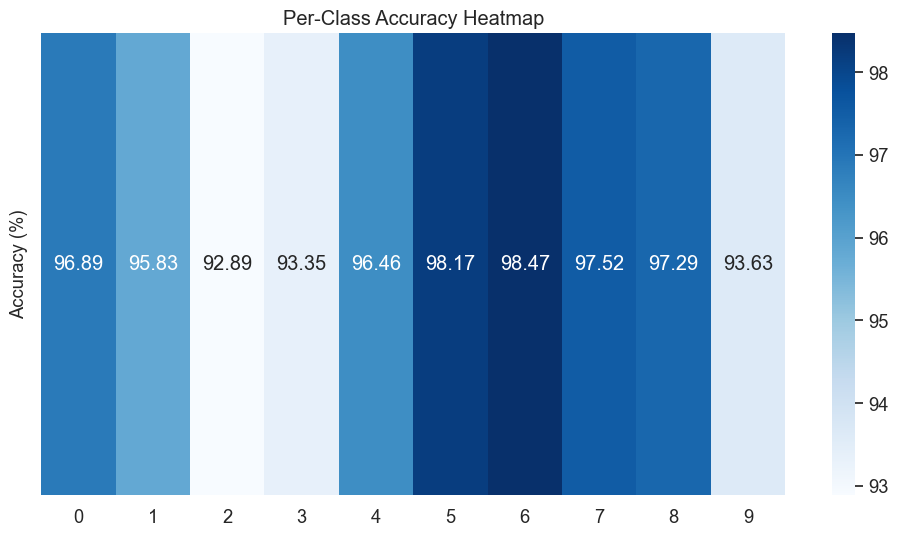

In [10]:
from test_model import Testing
# loading the best model
vocab = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'blank':10
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model = SpeechRecognitionModel(input_dim=128, hidden_dim=256, output_dim=len(vocab) + 1, num_layers=5).to(device)
best_model.load_state_dict(torch.load('..\\outputs\\best_MNIST_model.pth'))
tester = Testing(model=best_model, criterion=nn.CTCLoss(blank=10).to(device), device=device)

tester.test(test_loader, vocab)

## Adversarial Attacks as suggested by the professor

In [13]:
from test_model import Testing

# Let's grab one test sample

test_sample = test_dataset[1]
mel_spec, targets = test_sample
vocab = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'blank':10
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model = SpeechRecognitionModel(input_dim=128, hidden_dim=256, output_dim=len(vocab) + 1, num_layers=5).to(device)
best_model.load_state_dict(torch.load('..\\outputs\\best_MNIST_model.pth'))
tester = Testing(model=best_model, criterion=nn.CTCLoss(blank=10).to(device), device=device)

prediction = tester.predict(mel_spec, vocab)
print("Prediction:", prediction)
print("Target:", targets.numpy())


Prediction: 8
Target: 8


In [33]:
def pgd_attack(model, mel_spec, labels, criterion, epsilon=0.3, alpha=0.01, num_iter=20):
    if len(mel_spec.shape) == 2:  # (features, time)
        mel_spec = mel_spec.unsqueeze(0)  # (1, features, time)
    mel_spec = mel_spec.clone().detach().to(torch.float).requires_grad_(True)
    original_spec = mel_spec

    for _ in range(num_iter):
        # Forward pass
        output = model(mel_spec.permute(0, 2, 1))  # (batch, time, classes)
        output = output.log_softmax(2).permute(1, 0, 2)  # (time, batch, classes)

        input_lengths = torch.full(size=(output.size(1),), fill_value=output.size(0), dtype=torch.long).to(labels.device)
        target_lengths = torch.tensor([1 for _ in labels]).to(labels.device)
        loss = criterion(output, labels, input_lengths, target_lengths)

        loss.backward()

        mel_spec = mel_spec + alpha * mel_spec.grad.sign()

        mel_spec = torch.clamp(mel_spec, original_spec - epsilon, original_spec + epsilon)

        mel_spec = mel_spec.clone().detach().requires_grad_(True)

    return mel_spec.detach()

In [47]:
test_sample = test_dataset[10]
mel_spec, targets = test_sample  # Extract Mel spectrogram and its target label

# Convert the single sample to a batch format
mel_spec = mel_spec.unsqueeze(0).to(device)  # Add batch dimension (1, features, time)
targets = torch.tensor([targets]).to(device)  # Wrap target into a tensor with batch size

# Define the vocabulary
vocab = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'blank': 10
}

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CTCLoss(blank=10).to(device)
best_model = SpeechRecognitionModel(input_dim=128, hidden_dim=256, output_dim=len(vocab) + 1, num_layers=5).to(device)
best_model.load_state_dict(torch.load('../outputs/best_MNIST_model.pth'))

# Initialize the Testing class
tester = Testing(model=best_model, criterion=nn.CTCLoss(blank=10).to(device), device=device)

# Apply the PGD attack
adversarial_spec = pgd_attack(best_model, mel_spec.squeeze(0), targets, criterion, epsilon=0.3, alpha=0.01, num_iter=3)

# remove batch dimension from the adversarial example
adversarial_spec = adversarial_spec.squeeze(0)
# Predict using the adversarial example
prediction = tester.predict(adversarial_spec, vocab)
prediction1 = tester.predict(mel_spec.squeeze(0), vocab)
print("Prediction on adversarial example:", prediction)
print("Prediction on original example:", prediction1)
print("Target:", targets.cpu().numpy())

Prediction on adversarial example: 5
Prediction on original example: 1
Target: [1]


C:\Users\user\AppData\Local\Temp\ipykernel_8412\1866426314.py:13: RuntimeWarning: invalid value encountered in log2
  original_spectrogram = np.log2(mel_spec.squeeze(0).cpu().numpy() + eps)
C:\Users\user\AppData\Local\Temp\ipykernel_8412\1866426314.py:21: RuntimeWarning: invalid value encountered in log2
  adversarial_spectrogram = np.log2(adversarial_spec.squeeze(0).cpu().numpy() + eps)


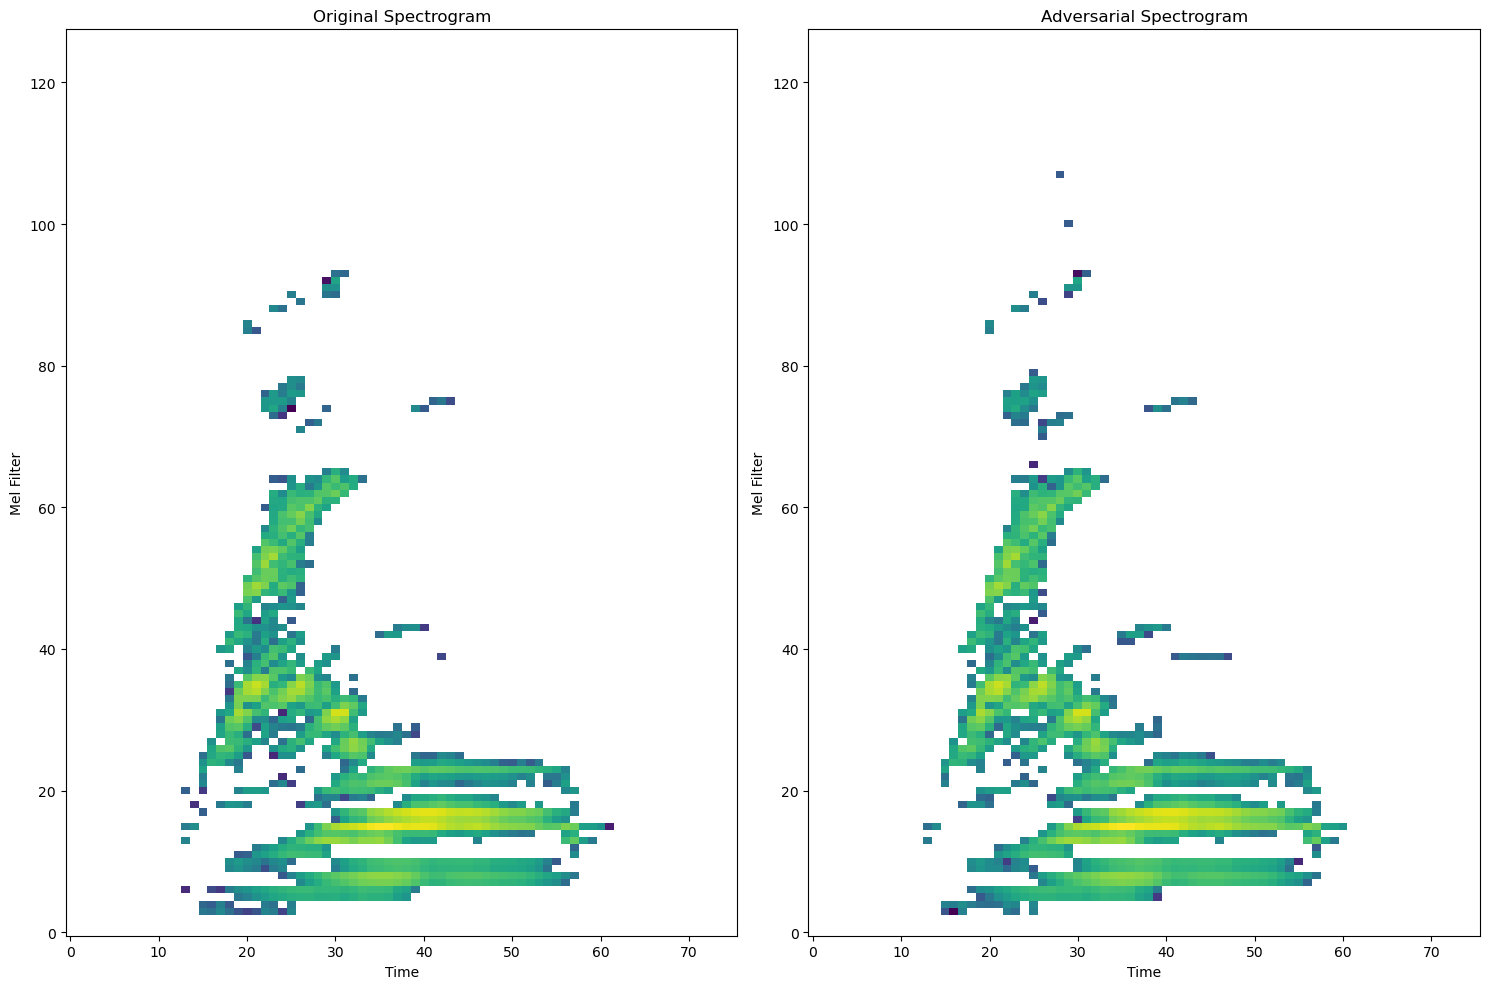

In [48]:
# let's take a look at the two spectograms side by side
import matplotlib.pyplot as plt
import numpy as np

# Add a small value to avoid log errors
eps = 0

# Visualize original and adversarial spectrograms
plt.figure(figsize=(15, 10))

# Original Spectrogram
plt.subplot(1, 2, 1)
original_spectrogram = np.log2(mel_spec.squeeze(0).cpu().numpy() + eps)
plt.imshow(original_spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.title("Original Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Filter")

# Adversarial Spectrogram
plt.subplot(1, 2, 2)
adversarial_spectrogram = np.log2(adversarial_spec.squeeze(0).cpu().numpy() + eps)
plt.imshow(adversarial_spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.title("Adversarial Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Filter")

plt.tight_layout()
plt.show()


